In [2]:
import pandas as pd
import numpy as np

In [3]:
data_deleted = pd.read_csv("data_deleted.csv",low_memory=False)
data_deleted.head()

,Unnamed: 0,author,content,is_retweet,tweet_id,following,followers
0,0,Shallon Enlow,"Thanks, Chairman @rssharma3! Enjoyed getting t...",False,8.250000e+17,428,721
1,1,Shallon Enlow,"""When they go low, we go high."" RT @ubergeekse...",False,8.250000e+17,428,721
2,2,Shallon Enlow,"RT @Camaran: Thanks for that, Chairman @AjitPa...",True,8.250000e+17,428,721
3,3,Shallon Enlow,If you haven't heard @hankhunt2's powerful sto...,False,8.250000e+17,428,721
4,4,Shallon Enlow,Especially grateful for unanimous passage of #...,False,8.250000e+17,428,721


In [8]:
legitmate_data = pd.read_csv("3000_legitimate_data.csv",low_memory=False)
new_data_deleted = pd.read_csv("3000_deleted_data.csv",low_memory=False)

In [10]:
mask = [isinstance(item, (str, bytes)) for item in new_data_deleted['Content']]
new_data_deleted= new_data_deleted.loc[mask]

mask_2 = [isinstance(item, (str, bytes)) for item in legitmate_data['Content']]
legitmate_data = legitmate_data.loc[mask_2]

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))

In [14]:
# Unigram and bigram
# load in all the modules we're going to need
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams

In [15]:
#Preprocessing 

from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'html.parser')
    #soup = BeautifulSoup(s,  "html.parser")
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [17]:
new_data_deleted['Clean'] = new_data_deleted.apply(lambda row: tweet_cleaner(row['Content']), axis = 1)

C:\Users\Maryam\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Maryam\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [18]:
legitmate_data['Clean'] = legitmate_data.apply(lambda row: tweet_cleaner(row['Content']), axis = 1)

In [19]:
tokenized = sent_tokenize(new_data_deleted['Clean'][0])    
for i in tokenized:
     
    # Word tokenizers is used to find the words
    # and punctuation in a string
    wordsList = nltk.word_tokenize(i)
    # removing stop words from wordList
    wordsList = [w for w in wordsList if not w in stop_words]
 
    #  Using a Tagger. Which is part-of-speech
    # tagger or POS-tagger.
    tagged = nltk.pos_tag(wordsList)
    print(tagged)

[('rnc', 'NN'), ('chair', 'NN'), ('cspan', 'VBP'), ('around', 'IN'), ('pm', 'NN'), ('tonight', 'NN'), ('cpac', 'NN')]


In [20]:
def post_tags(row):
    tokenized = sent_tokenize(row)
    my_list = []
    
    for i in tokenized:
     
        # Word tokenizers is used to find the words
        # and punctuation in a string
        wordsList = nltk.word_tokenize(i)
        # removing stop words from wordList
        wordsList = [w for w in wordsList if not w in stop_words]
 
        #  Using a Tagger. Which is part-of-speech
        # tagger or POS-tagger.
        tagged = nltk.pos_tag(wordsList)
        
        for  word in tagged:
            my_list.append(word[1])
        #my_list.append((tagged))
    return(my_list)

In [22]:
new_data_deleted['Postags'] = new_data_deleted.apply(lambda row: post_tags(row['Clean']), axis = 1)

In [23]:
legitmate_data['Postags'] = legitmate_data.apply(lambda row: post_tags(row['Clean']), axis = 1)

In [25]:
from nltk.data import load
tagdict = load('help/tagsets/upenn_tagset.pickle')
#tagdict['#']='HASH'

In [27]:
for i in tagdict.keys():
    new_data_deleted[i]=np.zeros(3000)

In [28]:
for i in tagdict.keys():
    legitmate_data[i]=np.zeros(3000)

In [32]:
for j in range(len(new_data_deleted)):
    for i in new_data_deleted['Postags'][j]:
        new_data_deleted[i][j]=new_data_deleted[i][j]+1

C:\Users\Maryam\AppData\Local\Temp/ipykernel_5124/3909286485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_deleted[i][j]=new_data_deleted[i][j]+1


In [35]:
for j in range(len(legitmate_data)):
    for i in legitmate_data['Postags'][j]:
        legitmate_data[i][j]=legitmate_data[i][j]+1

C:\Users\Maryam\AppData\Local\Temp/ipykernel_5124/2319622087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legitmate_data[i][j]=legitmate_data[i][j]+1


In [37]:
for i in range(len(new_data_deleted)):
     new_data_deleted.iloc[i, 8:55]=new_data_deleted.iloc[i, 8:55]/len(new_data_deleted['Postags'][i])

In [40]:
for i in range(len(legitmate_data)):
     legitmate_data.iloc[i, 8:55]=legitmate_data.iloc[i, 8:55]/len(legitmate_data['Postags'][i])

In [48]:
def Freq_Unigram(row):
    Unigram= row.split()
    #freq = nltk.FreqDist(Unigram)
    return (Unigram)

In [50]:
def Freq_Bigram(row):
    tokens = nltk.word_tokenize(row)
    Bigram= list(nltk.ngrams(tokens,2))
    #freq = nltk.FreqDist(Bigram)
    return(Bigram)
#     my_list=[]
#     for i in freq.values():
#         f=i/len(freq)
#         my_list.append(f)
#     return my_list

In [52]:
new_data_deleted['Freq_unigram'] = new_data_deleted.apply(lambda row: Freq_Unigram(row['Clean']), axis = 1)
new_data_deleted['Freq_bigram'] = new_data_deleted.apply(lambda row: Freq_Bigram(row['Clean']), axis = 1)

new_data_deleted.head(1)

,Author,Content,Tweet_id,Following,Followers,Deleted,Clean,Postags,LS,TO,...,WRB,NNP,EX,NNS,SYM,CC,CD,POS,Freq_unigram,Freq_bigram
0,Sean Spicer,RNC Chair @rnc @ReincePriebus will be on CSPAN...,1.680000e+17,995,448K,1,rnc chair will be on cspan around pm tonight f...,"[NN, NN, VBP, IN, NN, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[rnc, chair, will, be, on, cspan, around, pm, ...","[(rnc, chair), (chair, will), (will, be), (be,..."


In [53]:
legitmate_data['Freq_unigram'] = legitmate_data.apply(lambda row: Freq_Unigram(row['Clean']), axis = 1)
legitmate_data['Freq_bigram'] = legitmate_data.apply(lambda row: Freq_Bigram(row['Clean']), axis = 1)

legitmate_data.head(1)

,Author,Content,Following,Followers,Tweet_id,Deleted,Clean,Postags,LS,TO,...,WRB,NNP,EX,NNS,SYM,CC,CD,POS,Freq_unigram,Freq_bigram
0,ROOMOFRUMOR,IAAF chief Coe says corruption claims 'abhorre...,8724,12308,6.630000e+17,0,iaaf chief coe says corruption claims abhorren...,"[NN, NN, NN, VBZ, NN, NNS, JJ, NNS]",0.0,0.0,...,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,"[iaaf, chief, coe, says, corruption, claims, a...","[(iaaf, chief), (chief, coe), (coe, says), (sa..."


In [55]:
# Create a library for unigram deleted data
Unigram_lib_d=[]
for i in range(len(new_data_deleted)):
    u =new_data_deleted['Freq_unigram'][i]
    Unigram_lib_d.append(u)

Uni_list_d=[]
for i in Unigram_lib_d:
    for j in i:
        Uni_list_d.append(j)
        
len(Uni_list_d)

39995

In [56]:
def unique(list1):
    output = set()
    for x in list1:
        output.add(x)
    return output

Unigram_library_deleted = unique(Uni_list_d)
len(Unigram_library_deleted)

7144

In [59]:
# Create a library for unigram legitimate data
Unigram_lib_l=[]
for i in range(len(legitmate_data)):
    u =legitmate_data['Freq_unigram'][i]
    Unigram_lib_l.append(u)

Uni_list_l=[]
for i in Unigram_lib_l:
    for j in i:
        Uni_list_l.append(j)
        
len(Uni_list_l)

35777

In [60]:
Unigram_library_legitmate = unique(Uni_list_l)
len(Unigram_library_legitmate)

8579

In [61]:
# Create a library for bigram
Bigram_lib=[]
for i in range(len(new_data_deleted)):
    b =new_data_deleted['Freq_bigram'][i]    
    Bigram_lib.append(b)

In [62]:
Bi_list=[]
for i in Bigram_lib:
    for j in i:
        Bi_list.append(j)

In [63]:
Bigram_library = unique(Bi_list)
len(Bigram_library)

26827

In [68]:
for i in list(Unigram_library_deleted):
     new_data_deleted[i]=np.zeros(3000)

C:\Users\Maryam\AppData\Local\Temp/ipykernel_5124/3087835662.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_deleted[i]=np.zeros(3000)


In [70]:
for i in list(Unigram_library_legitmate):
     legitmate_data[i]=np.zeros(3000)

C:\Users\Maryam\AppData\Local\Temp/ipykernel_5124/3632394950.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  legitmate_data[i]=np.zeros(3000)


In [72]:
for j in range(len(new_data_deleted)):
    for i in new_data_deleted['Freq_unigram'][j]:
        new_data_deleted[i][j]=new_data_deleted[i][j]+1

C:\Users\Maryam\AppData\Local\Temp/ipykernel_5124/599738801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_deleted[i][j]=new_data_deleted[i][j]+1


In [73]:
for j in range(len(legitmate_data)):
    for i in legitmate_data['Freq_unigram'][j]:
        legitmate_data[i][j]=legitmate_data[i][j]+1

C:\Users\Maryam\AppData\Local\Temp/ipykernel_5124/2033997526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legitmate_data[i][j]=legitmate_data[i][j]+1


In [74]:
for i in range(len(new_data_deleted)):
     new_data_deleted.iloc[i, 55:7199]=new_data_deleted.iloc[i, 55:7199]/len(new_data_deleted['Freq_unigram'][i])

In [75]:
for i in range(len(legitmate_data)):
     legitmate_data.iloc[i, 55:8634]=legitmate_data.iloc[i, 55:8634]/len(legitmate_data['Freq_unigram'][i])

In [77]:
import nltk, re, pprint

In [78]:
def token(row):
    nltk_pos_tagged = nltk.pos_tag(row.split())
    return nltk_pos_tagged

def phrase_tag(row):
    grammar = r"""
    NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
    PP: {<IN><NP>}               # Chunk prepositions followed by NP
    VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
    CLAUSE: {<NP><VP>}           # Chunk NP, VP
    """
    cp = nltk.RegexpParser(grammar, loop=2)
    result = cp.parse(token(row))
    return(result)

In [80]:
new_data_deleted['phrase_tag'] = new_data_deleted.apply(lambda row: phrase_tag(row['Clean']), axis = 1)

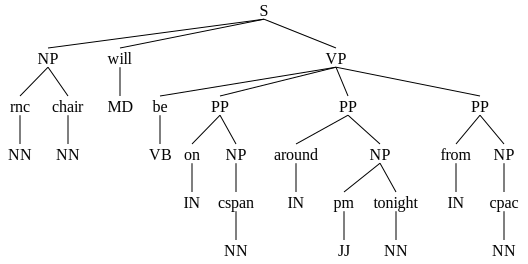

In [82]:
new_data_deleted['phrase_tag'][0]

In [83]:
legitmate_data['phrase_tag'] = legitmate_data.apply(lambda row: phrase_tag(row['Clean']), axis = 1)

In [85]:
new_data_deleted.shape

(3000, 7200)

In [86]:
legitmate_data.shape

(3000, 8635)

In [90]:
from collections import Counter
def token(row):
    nltk_pos_tagged = nltk.pos_tag(row.split())
    return nltk_pos_tagged

def Freq_phrase_tag_VP(row):
    grammar = r"""
    NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
    PP: {<IN><NP>}               # Chunk prepositions followed by NP
    VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
    CLAUSE: {<NP><VP>}           # Chunk NP, VP
    """
    cp = nltk.RegexpParser(grammar, loop=2)
    result = cp.parse(token(row))
    #return(result)
    
    pp=str(result).split()
    tags_counts = Counter(pp)
    VP=tags_counts['(VP']
    #NP=tags_counts['(NP']
    return VP

In [91]:
from collections import Counter
def token(row):
    nltk_pos_tagged = nltk.pos_tag(row.split())
    return nltk_pos_tagged

def Freq_phrase_tag_NP(row):
    grammar = r"""
    NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
    PP: {<IN><NP>}               # Chunk prepositions followed by NP
    VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
    CLAUSE: {<NP><VP>}           # Chunk NP, VP
    """
    cp = nltk.RegexpParser(grammar, loop=2)
    result = cp.parse(token(row))
    #return(result)
    
    pp=str(result).split()
    tags_counts = Counter(pp)
    #VP=tags_counts['(VP']
    NP=tags_counts['(NP']
    return  NP

In [137]:
new_data_deleted['VP'] = new_data_deleted.apply(lambda row: Freq_phrase_tag_VP(row['Clean']), axis = 1)
legitmate_data['VP'] = legitmate_data.apply(lambda row: Freq_phrase_tag_VP(row['Clean']), axis = 1)

In [139]:
new_data_deleted['NP'] = new_data_deleted.apply(lambda row: Freq_phrase_tag_NP(row['Clean']), axis = 1)
legitmate_data['NP'] = legitmate_data.apply(lambda row: Freq_phrase_tag_NP(row['Clean']), axis = 1)

In [144]:
new_data_deleted.shape

(3000, 7202)

In [146]:
for i in range(len(new_data_deleted)):
     new_data_deleted.iloc[i,7200:7202]=new_data_deleted.iloc[i,7200:7202]/(new_data_deleted.iloc[i,7200]+new_data_deleted.iloc[i,7201])

In [147]:
new_data_deleted.head()

,Author,Content,Tweet_id,Following,Followers,Deleted,Clean,Postags,LS,TO,...,great,bt,tubman,stick,werent,fast,jc,phrase_tag,VP,NP
0,Sean Spicer,RNC Chair @rnc @ReincePriebus will be on CSPAN...,1.680000e+17,995,448K,1,rnc chair will be on cspan around pm tonight f...,"[NN, NN, VBP, IN, NN, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[(rnc, NN), (chair, NN)], (will, MD), [(be, V...",0.20,0.80
1,Sean Spicer,Want to know the real cost of Obamacare http:/...,1.250000e+17,995,448K,1,want to know the real cost of obamacare,"[NN, VB, JJ, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[(want, NN)], (to, TO), [(know, VB), [('the',...",0.25,0.75
2,Sean Spicer,.@rollcall @pennstatetom makes the case for ph...,6.750000e+17,995,448K,1,makes the case for photographers media walk thru,"[VBZ, NN, NNS, NNS, VBP, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[(makes, VBZ), [(the, DT), (case, NN)], [(for,...",0.25,0.75
3,Ben & Candy Carson,Building strong relationships will #HealInspir...,6.520000e+17,50,2.2M,1,building strong relationships will healinspire...,"[NN, JJ, NNS, JJ, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[(building, NN), (strong, JJ), (relationships...",0.00,1.00
4,Larry Kudlow,@noellenikpour @StephenMoore @batchelorshow @M...,5.170000e+17,322,235.9,1,hi noelle please give me a yell,"[NN, JJ, NN, VB, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[(hi, NN), (noelle, JJ), (please, NN)], (give...",0.00,1.00


In [148]:
legitmate_data.shape

(3000, 8637)

In [156]:
legitmate_data.iloc[0,8635]+legitmate_data.iloc[0,8636]

3

In [157]:
for i in range(len(legitmate_data)):
     legitmate_data.iloc[i,8635:8637]=legitmate_data.iloc[i,8635:8637]/(legitmate_data.iloc[i,8635]+legitmate_data.iloc[i,8636])

In [158]:
legitmate_data.head()

,Author,Content,Following,Followers,Tweet_id,Deleted,Clean,Postags,LS,TO,...,allowing,rips,bibi,hope,great,playoffs,foo,phrase_tag,VP,NP
0,ROOMOFRUMOR,IAAF chief Coe says corruption claims 'abhorre...,8724,12308,6.630000e+17,0,iaaf chief coe says corruption claims abhorren...,"[NN, NN, NN, VBZ, NN, NNS, JJ, NNS]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[[('iaaf', 'NN'), ('chief', 'NN'), ('coe', 'N...",0.333333,0.666667
1,JOHJOHHO,https://t.co/wwwUQ32qGV #BritainInOut #Goodbye...,105,11,7.460000e+17,0,britaininout goodbyeuk remainineu euref,"[IN, JJ, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[(britaininout, IN), [('goodbyeuk', 'JJ'), ('...",0.000000,1.000000
2,SEATTLE_POST,Pennsylvania Democrats pick establishment’s Se...,4427,15633,7.250000e+17,0,pennsylvania democrats pick establishment s se...,"[NN, NNS, VBP, JJ, NN, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[[('pennsylvania', 'NN'), ('democrats', 'NNS'...",0.333333,0.666667
3,ROOMOFRUMOR,Last year's runner-up Johnson in buoyant mood ...,8598,12284,7.430000e+17,0,last year s runner up johnson in buoyant mood ...,"[JJ, NN, NN, NN, JJ, NN, JJ, NNS]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[(last, JJ), (year, NN)], (s, VBD), (runner, ...",0.000000,1.000000
4,KANSASDAILYNEWS,Theft of construction equipment from Wamego bu...,5148,24459,7.200000e+17,0,theft of construction equipment from wamego bu...,"[NN, NN, NN, NN, NN, VBD, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[[(theft, NN)], [(of, IN), [('construction', '...",0.200000,0.800000


In [159]:
# get the number of missing data points for Deleted data
missing_values_count_new_data_deleted = new_data_deleted.isnull().sum()
print('Number of missing points in new_data_deleted',missing_values_count_new_data_deleted)

Number of missing points in new_data_deleted Author         0
Content        0
Tweet_id       0
Following      0
Followers      0
              ..
fast          18
jc            18
phrase_tag     0
VP            63
NP            63
Length: 7202, dtype: int64


In [161]:
# how many total missing values do we have?
total_cells = np.product(new_data_deleted.shape)
total_missing = missing_values_count_new_data_deleted.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print('The total percent of data in new_data_deleted missing is',percent_missing)

The total percent of data in new_data_deleted missing is 0.6009580672035546


In [162]:
# get the number of missing data points for legitmate_data
missing_values_count_legitmate_data = legitmate_data.isnull().sum()
print('Number of missing points in new_data_deleted',missing_values_count_legitmate_data)

Number of missing points in new_data_deleted Author         0
Content        0
Following      0
Followers      0
Tweet_id       0
              ..
playoffs       9
foo            9
phrase_tag     0
VP            19
NP            19
Length: 8637, dtype: int64


In [163]:
# how many total missing values do we have?
total_cells = np.product(legitmate_data.shape)
total_missing = missing_values_count_legitmate_data.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print('The total percent of data in legitmate_data missing is',percent_missing)

The total percent of data in legitmate_data missing is 0.3002161244259195


In [164]:
# remove all the rows that contain a missing value
Clean_new_data_deleted= new_data_deleted.dropna()
Clean_legitmate_data= legitmate_data.dropna()

In [165]:
Clean_new_data_deleted.shape

(2936, 7202)

In [166]:
Clean_legitmate_data.shape

(2980, 8637)

In [167]:
# Clean_new_data_deleted.to_csv('Last_version_deleted.csv', index = False, encoding='utf-8-sig')
# Clean_legitmate_data.to_csv('Last_version_legitmate.csv', index = False, encoding='utf-8-sig')

In [177]:
df_deleted_pos = Clean_new_data_deleted.iloc[:,:53]
df_deleted_pos.head()

,Author,Content,Tweet_id,Following,Followers,Deleted,Clean,Postags,LS,TO,...,MD,VB,WRB,NNP,EX,NNS,SYM,CC,CD,POS
0,Sean Spicer,RNC Chair @rnc @ReincePriebus will be on CSPAN...,1.680000e+17,995,448K,1,rnc chair will be on cspan around pm tonight f...,"[NN, NN, VBP, IN, NN, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Sean Spicer,Want to know the real cost of Obamacare http:/...,1.250000e+17,995,448K,1,want to know the real cost of obamacare,"[NN, VB, JJ, NN, NN]",0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Sean Spicer,.@rollcall @pennstatetom makes the case for ph...,6.750000e+17,995,448K,1,makes the case for photographers media walk thru,"[VBZ, NN, NNS, NNS, VBP, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
3,Ben & Candy Carson,Building strong relationships will #HealInspir...,6.520000e+17,50,2.2M,1,building strong relationships will healinspire...,"[NN, JJ, NNS, JJ, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0
4,Larry Kudlow,@noellenikpour @StephenMoore @batchelorshow @M...,5.170000e+17,322,235.9,1,hi noelle please give me a yell,"[NN, JJ, NN, VB, NN]",0.0,0.0,...,0.0,0.2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [178]:
legitmate_data_pos = Clean_legitmate_data.iloc[:,:53]
legitmate_data_pos.head()

,Author,Content,Following,Followers,Tweet_id,Deleted,Clean,Postags,LS,TO,...,MD,VB,WRB,NNP,EX,NNS,SYM,CC,CD,POS
0,ROOMOFRUMOR,IAAF chief Coe says corruption claims 'abhorre...,8724,12308,6.630000e+17,0,iaaf chief coe says corruption claims abhorren...,"[NN, NN, NN, VBZ, NN, NNS, JJ, NNS]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0
1,JOHJOHHO,https://t.co/wwwUQ32qGV #BritainInOut #Goodbye...,105,11,7.460000e+17,0,britaininout goodbyeuk remainineu euref,"[IN, JJ, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,SEATTLE_POST,Pennsylvania Democrats pick establishment’s Se...,4427,15633,7.250000e+17,0,pennsylvania democrats pick establishment s se...,"[NN, NNS, VBP, JJ, NN, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0
3,ROOMOFRUMOR,Last year's runner-up Johnson in buoyant mood ...,8598,12284,7.430000e+17,0,last year s runner up johnson in buoyant mood ...,"[JJ, NN, NN, NN, JJ, NN, JJ, NNS]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0
4,KANSASDAILYNEWS,Theft of construction equipment from Wamego bu...,5148,24459,7.200000e+17,0,theft of construction equipment from wamego bu...,"[NN, NN, NN, NN, NN, VBD, NN, NN]",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [179]:
full = pd.concat([df_deleted_pos, legitmate_data_pos],sort=False)
full.shape

(5916, 53)